# T0 and T2 Units Integration Example

In this notebook we will exemplify how we can integrate T0 and T2 units by having the latter process the output of the former. We will run this units in standalone mode (i.e. without the need to run the whole AMPEL system and its services).

## T0 Unit

First, as in the `t0_unit_example` notebook, we will proceed to implement our T0 unit's class by inheriting from the `AbsAlertFilter` class:

In [1]:
from ampel.base.abstract.AbsAlertFilter import AbsAlertFilter

class MinPhotopointsFilter(AbsAlertFilter):
    version=1.0
    def __init__(self, on_match_t2_units=["SNCOSMO"], base_config=None, run_config=None, logger=None):
        self.on_match_t2_units = on_match_t2_units
        
    def apply(self, ampel_alert):
        if len(ampel_alert.pps) < 15:
            return None
        return self.on_match_t2_units

Here we just implemented a simple T0 unit that filters out all alerts with less than 15 photopoints. 

Next we need a dataset over which to run the T0 unit. Let's download a small TAR file from the ZTF website for this.

In [2]:
import urllib.request

small_test_tar_url = 'https://ztf.uw.edu/alerts/public/ztf_public_20181129.tar.gz'
small_test_tar_path = 'ztf_public_20181129.tar.gz'

urllib.request.urlretrieve(small_test_tar_url, small_test_tar_path)

('ztf_public_20181129.tar.gz', <http.client.HTTPMessage at 0x7f133c3b6198>)

Now we can instantiate our implemented T0 unit's class and give it as a parameter to the `DevAlertProcessor` in order to be run in standalone mode:

In [3]:
from ampel.ztf.pipeline.t0.DevAlertProcessor import DevAlertProcessor

my_filter = MinPhotopointsFilter()
dap = DevAlertProcessor(my_filter, use_dev_alerts=True)

We may now proceed to run our T0 unit over the dataset and measure the time it takes to be completely processed:

In [4]:
import time

print ("processing alerts from %s" % small_test_tar_path)
start = time.time()
nproc = dap.process_tar(small_test_tar_path)
end = time.time()
print ("processed %d alerts in %.2e sec"%(nproc, end-start))

processing alerts from ztf_public_20181129.tar.gz
2019-02-21 12:34:34 INFO - Rejecting 697251924815010000 (objectId: ZTF18abvetqi)
2019-02-21 12:34:34 INFO - Rejecting 697252380615010002 (objectId: ZTF18abryrxy)
2019-02-21 12:34:34 INFO - Rejecting 697251920615010004 (objectId: ZTF18abvryvj)
2019-02-21 12:34:34 INFO - Rejecting 697251920415015001 (objectId: ZTF18abvdmcb)
2019-02-21 12:34:34 INFO - Rejecting 697251920815010007 (objectId: ZTF18abvlvih)
2019-02-21 12:34:34 INFO - Rejecting 697251922015015007 (objectId: ZTF18acsbjvl)
2019-02-21 12:34:34 INFO - Rejecting 697252841015015004 (objectId: ZTF18acsbtce)
2019-02-21 12:34:34 INFO - Rejecting 697252842115015000 (objectId: ZTF18acsbtei)
2019-02-21 12:34:34 INFO - Rejecting 697252842615015009 (objectId: ZTF18acsbtfc)
2019-02-21 12:34:34 INFO - Rejecting 697252382215010000 (objectId: ZTF18acsbthc)
2019-02-21 12:34:34 INFO - Rejecting 697252841315015005 (objectId: ZTF18acsbthq)
2019-02-21 12:34:34 INFO - Rejecting 697252381715010004 (ob

2019-02-21 12:34:34 INFO - Rejecting 697252382015015001 (objectId: ZTF18acsbtho)
2019-02-21 12:34:34 INFO - Rejecting 697252381715010006 (objectId: ZTF18acsbtjv)
2019-02-21 12:34:34 INFO - Rejecting 697252381615015002 (objectId: ZTF18abrabqy)
2019-02-21 12:34:34 INFO - Rejecting 697252381115015002 (objectId: ZTF18abscksd)
2019-02-21 12:34:34 INFO - Rejecting 697251923115010004 (objectId: ZTF18abvrzta)
2019-02-21 12:34:34 INFO - Rejecting 697251926015015004 (objectId: ZTF18acsbjnc)
2019-02-21 12:34:34 INFO - Rejecting 697251921415015003 (objectId: ZTF18abvethj)
2019-02-21 12:34:34 INFO - Rejecting 697251920415010000 (objectId: ZTF18acsbjou)
2019-02-21 12:34:34 INFO - Rejecting 697251920815010004 (objectId: ZTF18abvdmfx)
2019-02-21 12:34:34 INFO - Rejecting 697251922515015010 (objectId: ZTF18acgbarm)
2019-02-21 12:34:34 INFO - Rejecting 697252841015015012 (objectId: ZTF18abslhsh)
2019-02-21 12:34:34 INFO - Rejecting 697252842715010000 (objectId: ZTF18absqged)
2019-02-21 12:34:34 INFO - R

2019-02-21 12:34:34 INFO - Rejecting 697252841615010008 (objectId: ZTF18abtfvva)
2019-02-21 12:34:34 INFO - Rejecting 697252842015015008 (objectId: ZTF18acsbtgb)
2019-02-21 12:34:34 INFO - Rejecting 697252840415015007 (objectId: ZTF18acsbthn)
2019-02-21 12:34:34 INFO - Rejecting 697252381715010005 (objectId: ZTF18acsbtjp)
2019-02-21 12:34:34 INFO - Rejecting 697252382515015000 (objectId: ZTF18acsbtlh)
2019-02-21 12:34:34 INFO - Rejecting 697252381915015002 (objectId: ZTF18acnjntb)
2019-02-21 12:34:34 INFO - Rejecting 697252841215010003 (objectId: ZTF17aabuxzj)
2019-02-21 12:34:34 INFO - Rejecting 697252380415015004 (objectId: ZTF18acjwqac)
2019-02-21 12:34:34 INFO - Rejecting 697252380115010010 (objectId: ZTF18acsbjko)
2019-02-21 12:34:34 INFO - Rejecting 697252380515015008 (objectId: ZTF18abodpsb)
2019-02-21 12:34:34 INFO - Rejecting 697251922815010005 (objectId: ZTF18acbupxz)
2019-02-21 12:34:34 INFO - Rejecting 697251920715010010 (objectId: ZTF18acsbjoy)
2019-02-21 12:34:34 INFO - R

2019-02-21 12:34:35 INFO - Rejecting 697252384615010016 (objectId: ZTF18acsbtwk)
2019-02-21 12:34:35 INFO - Rejecting 697252844515015002 (objectId: ZTF18acsbtwe)
2019-02-21 12:34:35 INFO - Rejecting 697252843315015018 (objectId: ZTF18abshook)
2019-02-21 12:34:35 INFO - Rejecting 697252844115015016 (objectId: ZTF18acsbued)
2019-02-21 12:34:35 INFO - Rejecting 697252843215010009 (objectId: ZTF18achkzes)
2019-02-21 12:34:35 INFO - Rejecting 697252844015010006 (objectId: ZTF18abosdtx)
2019-02-21 12:34:35 INFO - Rejecting 697252843015015017 (objectId: ZTF18acsbusi)
2019-02-21 12:34:35 INFO - Rejecting 697252845815015006 (objectId: ZTF18acsbutp)
2019-02-21 12:34:35 INFO - Rejecting 697252385915015017 (objectId: ZTF18acsbuuh)
2019-02-21 12:34:35 INFO - Rejecting 697252845015010003 (objectId: ZTF17aabuxmy)
2019-02-21 12:34:35 INFO - Rejecting 697252840115015003 (objectId: ZTF18acsbtnu)
2019-02-21 12:34:35 INFO - Rejecting 697252382115015006 (objectId: ZTF18abodpru)
2019-02-21 12:34:35 INFO - R

2019-02-21 12:34:35 INFO - Rejecting 697252383415015002 (objectId: ZTF18abodptl)
2019-02-21 12:34:35 INFO - Rejecting 697252843515015015 (objectId: ZTF18acsbttn)
2019-02-21 12:34:35 INFO - Rejecting 697252384315015008 (objectId: ZTF18abomlcu)
2019-02-21 12:34:35 INFO - Rejecting 697252844615015008 (objectId: ZTF18acsbtvx)
2019-02-21 12:34:35 INFO - Rejecting 697252384615010013 (objectId: ZTF18acsbtws)
2019-02-21 12:34:35 INFO - Rejecting 697252844215015007 (objectId: ZTF18acsbtzl)
2019-02-21 12:34:35 INFO - Rejecting 697252843715015002 (objectId: ZTF18acsbuek)
2019-02-21 12:34:35 INFO - Rejecting 697252843215015001 (objectId: ZTF18acsbugn)
2019-02-21 12:34:35 INFO - Rejecting 697251923415015004 (objectId: ZTF18acsbuji)
2019-02-21 12:34:35 INFO - Rejecting 697252845615015006 (objectId: ZTF18acsbury)
2019-02-21 12:34:35 INFO - Rejecting 697252845815015016 (objectId: ZTF18acsbutm)
2019-02-21 12:34:35 INFO - Rejecting 697252382815010000 (objectId: ZTF18abomkuc)
2019-02-21 12:34:35 INFO - R

Next, let's see how many alerts from the dataset passed the filter:

In [5]:
n_good, n_bad = len(dap.get_accepted_alerts()), len(dap.get_rejected_alerts())
print ("%d alerts accepted by the filter (%.2f perc)"%(n_good, 100*n_good/nproc))
print ("%d alerts rejected by the filter (%.2f perc)"%(n_bad, 100*n_bad/nproc))

11 alerts accepted by the filter (2.20 perc)
488 alerts rejected by the filter (97.80 perc)


We can also plot any of the accepted alerts in order to make sure it contains the desired amount of photopoints.

2019-02-21 12:34:35 INFO Initialized AmpelAlertPlotter in interactive mode.


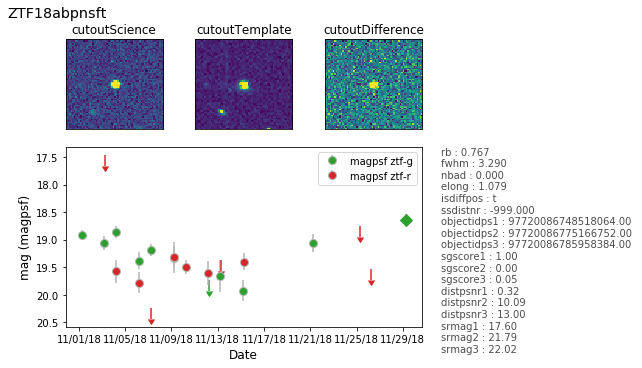

In [6]:
from ampel.ztf.view.AmpelAlertPlotter import AmpelAlertPlotter
%matplotlib inline
from random import choice

accepted = dap.get_accepted_alerts()
accepted_plot = AmpelAlertPlotter(interactive=True)
accepted_plot.summary_plot(choice(accepted))

## T2 Unit

Now, we proceed to implement a T2 unit to run over the set of alerts accepted by our previously implemented T0 unit.

In [7]:
from ampel.base.abstract.AbsT2Unit import AbsT2Unit
import numpy as np

class T2DetectRising(AbsT2Unit):
    
    def __init__(self, logger=None, base_config=None):
        pass
    
    def run(self, light_curve=None, run_config=None):
        obs_date = light_curve.get_values("obs_date")
        mag = light_curve.get_values("mag")
        mag_arg_max = np.argmax(mag)
        mag_length = len(mag)
        rising = mag_arg_max == mag_length-1
        poly = np.polyfit(obs_date, mag, 3)
        
        return {
            'rising': rising,
            'poly_coef': poly,
        }

This unit we have just implemented simply verifies if the last photopoint of the light curve is the brightest, and then returns a dictionary with a boolean value called `rising` which indicates if the brightness of the lightcurve is rising or not. As an addition, it is also returning a `poly_coef` value which contains an array with the coeficients of the fitted polynomial.

Now, we choose a random element from the set of alerts selected by our previously implemented T0 unit, and transform it into a light curve object with the help of the `_create_lc` method:

In [8]:
from ampel.ztf.utils.ZIAlertUtils import ZIAlertUtils

alert = choice(accepted)
light_curve = ZIAlertUtils._create_lc(alert.pps, alert.uls)

Afterwards, we instantiate our T2 unit and run it over the `LightCurve` object. As a result we obtain a dictionary with the relevant values our unit is calculating.

In [9]:
myt2 = T2DetectRising()
out = myt2.run(light_curve)
print(out)

{'rising': False, 'poly_coef': array([-2.23464056e-10,  5.49370477e-04,  1.35058531e+03, -3.32031783e+09])}


/home/nmiranda/miniconda3/envs/ampel-dev-git/lib/python3.6/site-packages/ipykernel_launcher.py:15: RankWarning: Polyfit may be poorly conditioned
  from ipykernel import kernelapp as app


We can now plot the light curve in order to verify if it is indeed rising or not, as indicated by the `rising` value returned by our T2 unit:

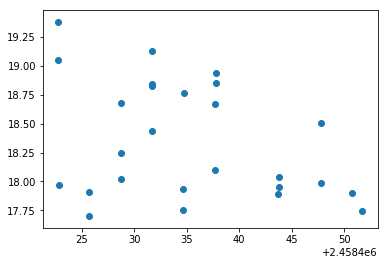

In [10]:
import matplotlib.pyplot as plt

ax = plt.axes()
ax.scatter(*zip(*light_curve.get_tuples('obs_date', 'mag')))